epoch:0 |  logistic loss 0.696982 |  Testing error percentage: 8.563465%
epoch:1 |  logistic loss 0.527361 |  Testing error percentage: 4.231060%
epoch:2 |  logistic loss 0.427807 |  Testing error percentage: 3.851026%
epoch:3 |  logistic loss 0.364280 |  Testing error percentage: 3.631449%
epoch:4 |  logistic loss 0.320473 |  Testing error percentage: 3.521663%
epoch:5 |  logistic loss 0.288406 |  Testing error percentage: 3.369647%
epoch:6 |  logistic loss 0.263845 |  Testing error percentage: 3.293639%
epoch:7 |  logistic loss 0.244366 |  Testing error percentage: 3.200746%
epoch:8 |  logistic loss 0.228490 |  Testing error percentage: 3.133184%
epoch:9 |  logistic loss 0.215263 |  Testing error percentage: 3.082508%
epoch:10 |  logistic loss 0.204044 |  Testing error percentage: 3.014946%
epoch:11 |  logistic loss 0.194387 |  Testing error percentage: 2.955830%
epoch:12 |  logistic loss 0.185970 |  Testing error percentage: 2.879822%
epoch:13 |  logistic loss 0.178555 |  Testing er

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


lr = 0.0001 Training error rate: 13.216788% Test error rate: 15.376675%


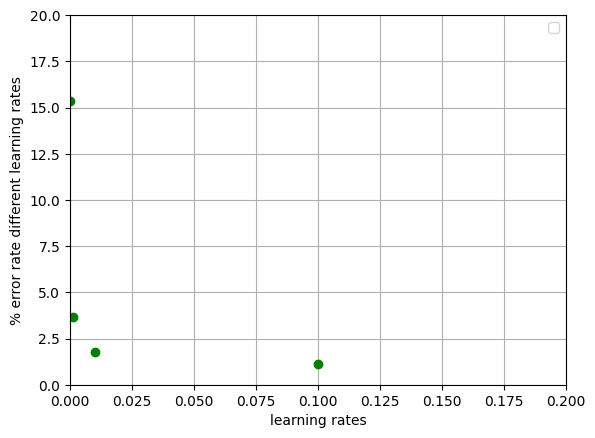

batch size = 10 |  Training error rate: 0.000000% |  Test error rate: 2.528381%
batch size = 100 |  Training error rate: 9.756100% |  Test error rate: 5.985552%
batch size = 200 |  Training error rate: 17.073172% |  Test error rate: 11.919504%
batch size = 300 |  Training error rate: 25.531918% |  Test error rate: 18.782252%
batch size = 400 |  Training error rate: 32.780081% |  Test error rate: 25.180596%
batch size = 2000 |  Training error rate: 44.975555% |  Test error rate: 43.859649%
batch size = 3000 |  Training error rate: 46.920097% |  Test error rate: 45.614034%
batch size = 5000 |  Training error rate: 48.126018% |  Test error rate: 46.439630%


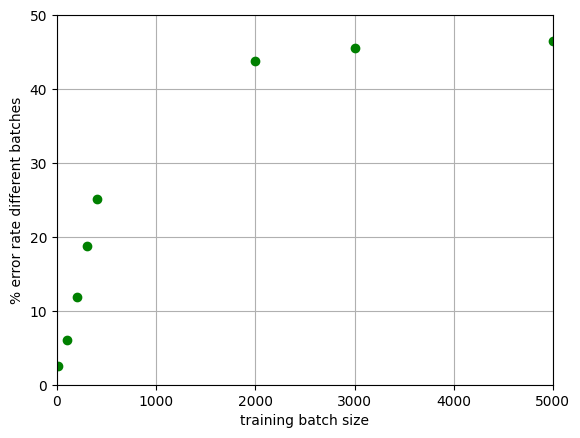

set size = 10 |  Training error rate: 0.000000% |  Test error rate: 8.823532%
set size = 100 |  Training error rate: 1.999998% |  Test error rate: 5.314755%
set size = 1000 |  Training error rate: 2.899998% |  Test error rate: 4.024768%
set size = 4000 |  Training error rate: 3.175002% |  Test error rate: 3.663570%
set size = 6000 |  Training error rate: 3.383332% |  Test error rate: 3.611970%
set size = 10000 |  Training error rate: 3.479999% |  Test error rate: 3.663570%


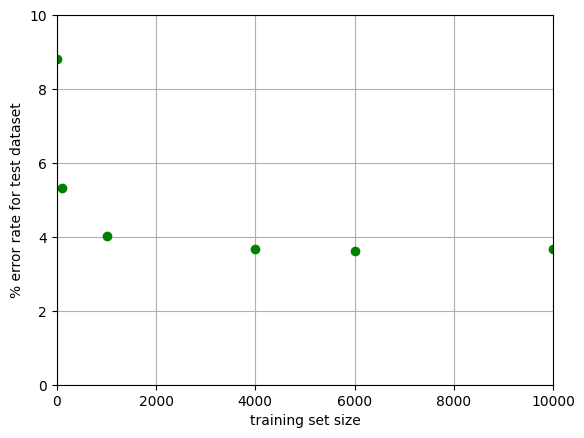

In [1]:
import numpy as np
import torch as torch
import torchvision.datasets as datasets
import warnings
import matplotlib.pyplot as plt

# I did this because I was getting a bunch of warnings so this is how I ended up muting them
warnings.simplefilter("ignore")

n_classes = 1
n_features = 28 * 28
full_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
full_test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

x_train = full_train_dataset.data.numpy().reshape(-1, n_features).astype(dtype=float) / 255.0
x_test = full_test_dataset.data.numpy().reshape(-1, n_features).astype(dtype=float) / 255.0
y_train_cat = full_train_dataset.targets.numpy()
y_test_cat = full_test_dataset.targets.numpy()
y_test_cat2 = []
x_test2 = []
y_train_cat2 = []
x_train2 = []
# print(y_test_cat[2])
# removed all non 0 and 6's by going through the true classes
for item in range(0, len(y_test_cat)):
    if y_test_cat[item] == 6:
        y_test_cat2.append(1)
        x_test2.append(x_test[item])
    elif y_test_cat[item] == 0:
        y_test_cat2.append(-1)
        x_test2.append(x_test[item])
for item in range(0, len(y_train_cat)):
    if y_train_cat[item] == 6:
        y_train_cat2.append(1)
        x_train2.append(x_train[item])
    elif y_train_cat[item] == 0:
        y_train_cat2.append(-1)
        x_train2.append(x_train[item])
# ---------------------------------------------------------------------------------------#
# declaration of random variables and creation of testing and training arrays made to miminc the examples you gave us
np.random.seed(42)
device = torch.device('cpu')

t_x_test = torch.tensor(x_test2, requires_grad=False, device=device)
t_y_test = torch.tensor(y_test_cat2, requires_grad=False, device=device)
t_x_train = torch.tensor(x_train2, requires_grad=False, device=device)
t_y_train = torch.tensor(y_train_cat2, requires_grad=False, device=device)
# making the initial optimizer
init_std_dev = 0.01
initialW = init_std_dev * np.random.randn(n_features)
W = torch.tensor(initialW, requires_grad=True, device=device)
b = torch.zeros(1, requires_grad=True, device=device)
learning_rate = 0.1
optimizer = torch.optim.SGD([W, b], lr=learning_rate)

"""Standard solution Below"""

n_epochs = 50
for epoch in range(n_epochs):
    optimizer.zero_grad()
    linear_predictions_std = torch.matmul(t_x_train, W) + b
    logistic_loss_std = torch.mean(torch.log(1 + torch.exp(-t_y_train * linear_predictions_std)))
    logistic_loss_std.backward()
    optimizer.step()

    with torch.no_grad():
        linear_predictions_std = torch.matmul(t_x_train, W) + b
        predicted_classes = torch.sign(linear_predictions_std)
        accuracy_std = torch.mean((predicted_classes == t_y_train).float())
        error_percentage_std = 100 * (1 - accuracy_std.item())
        print(f"epoch:{epoch} | ", f'logistic loss {logistic_loss_std:.6f} | ',
              f'Testing error percentage: {error_percentage_std:.6f}%')



""" Varying learning rates"""

# this is the experiment for varying learning rates and their error rates
n_epochs = 500
learning_rates = [0.1, 0.01, .001, .0001]
set_rates = []
for rate in learning_rates:
    W = torch.tensor(initialW, requires_grad=True, device=device)
    b = torch.zeros(1, requires_grad=True, device=device)
    optimizer = torch.optim.SGD([W, b], lr=rate)
    for epoch in range(n_epochs):
        # using the same 500 epochs how do the different learning rates work?
        optimizer.zero_grad()
        linear_predictions = torch.matmul(t_x_train, W) + b
        logistic_loss = torch.mean(torch.log(1 + torch.exp(-t_y_train * linear_predictions)))
        logistic_loss.backward()
        optimizer.step()

    with torch.no_grad():
        # calculates the accuracy and error% after it has run through the data at each different learning rate
        linear_predictions_test = torch.matmul(t_x_test, W) + b
        predicted_classes_train = torch.sign(linear_predictions)
        predicted_classes_test = torch.sign(linear_predictions_test)

        accuracy_train = torch.mean((predicted_classes_train == t_y_train).float())
        error_train = 100 * (1 - accuracy_train.item())

        accuracy_test = torch.mean((predicted_classes_test == t_y_test).float())
        error_test = 100 * (1 - accuracy_test.item())
    set_rates.append((rate, error_test))
    print(f"lr = {rate}", f'Training error rate: {error_train:.6f}%', f'Test error rate: {error_test:.6f}%')
# below is the varying learning rates graph
plt.figure()
plt.ylim([0, 20])
plt.xlim([0,.2])
plt.grid(True, which="both", axis="both")
plt.xlabel("learning rates")
plt.ylabel("% error rate different learning rates")
plt.legend()
for item in set_rates:
    plt.plot(float(item[0]),float(item[1]),marker="o", color='green')
plt.show()

"""CHANGES IN BATCH SIZES BELOW"""

# reseting the optimizer for adjusting batch sizes
W = torch.tensor(initialW, requires_grad=True, device=device)
b = torch.zeros(1, requires_grad=True, device=device)
optimizer = torch.optim.SGD([W, b], lr=.001)

# batches being used
# note - I only did a single epoch for each batch size because it still showed the results well
# also used a lr or .001 for all of the batches
batches = [10, 100, 200, 300, 400,2000,3000,5000]
batches_ran = 0
set_batches = []

for i in range(0, len(batches)):
    batch_size = batches[i]
    batches_ran = 0
    W = torch.tensor(initialW, requires_grad=True, device=device)
    b = torch.zeros(1, requires_grad=True, device=device)
    optimizer = torch.optim.SGD([W, b], lr=.001)
    for j in range(0, len(t_x_train), batch_size):
        t_x_train_new = torch.tensor(t_x_train[j:j + batch_size, :], requires_grad=False, device=device)
        t_y_train_new = torch.tensor(t_y_train[j:j + batch_size], requires_grad=False, device=device)
        batches_ran += 1

        optimizer.zero_grad()
        linear_predictions_train_batch = torch.matmul(t_x_train_new, W) + b
        logistic_loss_batch = torch.mean(torch.log(1 + torch.exp(-t_y_train_new * linear_predictions_train_batch)))
        logistic_loss_batch.backward()
        optimizer.step()
    with torch.no_grad():

        # batches accuracy claculation
        linear_predictions_test_batch = torch.matmul(t_x_test, W) + b

        predicted_classes_train_batch = torch.sign(linear_predictions_train_batch)
        predicted_classes_test_batch = torch.sign(linear_predictions_test_batch)

        accuracy_train_batch = torch.mean((predicted_classes_train_batch == t_y_train_new).float())
        error_train_batch = 100 * (1 - accuracy_train_batch.item())

        accuracy_test_batch = torch.mean((predicted_classes_test_batch == t_y_test).float())
        error_test_batch = 100 * (1 - accuracy_test_batch.item())
    set_batches.append((batch_size, error_test_batch))
    print(f"batch size = {batch_size} | ", f'Training error rate: {error_train_batch:.6f}% | ',
          f'Test error rate: {error_test_batch:.6f}%')

# batches graphing below
plt.figure()
plt.ylim([0, 50])
plt.xlim([0,5000])
plt.grid(True, which="both", axis="both")
plt.xlabel("training batch size")
plt.ylabel("% error rate different batches")
for item in set_batches:
    plt.plot(float(item[0]),float(item[1]),marker="o", color='green')
plt.show()

"""CHANGES in size of training set"""

# reseting the optimizer for different set sizes
# number of epocs is the same and lr = 0.001 for all runs
number_epochs = 500
training_sizes = [10, 100, 1000, 4000, 6000, 10000]
W = torch.tensor(initialW, requires_grad=True, device=device)
b = torch.zeros(1, requires_grad=True, device=device)
optimizer = torch.optim.SGD([W, b], lr=0.001)
set_testerror = []
for i in range(0, len(training_sizes)):
    W = torch.tensor(initialW, requires_grad=True, device=device)
    b = torch.zeros(1, requires_grad=True, device=device)
    optimizer = torch.optim.SGD([W, b], lr=0.001)
    for epoch in range(0, number_epochs):
        set_size = training_sizes[i]

        t_x_train_small = torch.tensor(t_x_train[0:set_size, :], requires_grad=False, device=device)
        t_y_train_small = torch.tensor(t_y_train[0:set_size], requires_grad=False, device=device)
        # print(len(t_y_train_small),len(t_y_train_small))

        optimizer.zero_grad()
        linear_predictions_train_size = torch.matmul(t_x_train_small, W) + b
        logistic_loss_size = torch.mean(torch.log(1 + torch.exp(-t_y_train_small * linear_predictions_train_size)))
        logistic_loss_size.backward()
        optimizer.step()
        ### done to here ###
    with torch.no_grad():
        # calculating error% after 500 epochs for each given set size
        linear_predictions_test_size = torch.matmul(t_x_test, W) + b

        predicted_classes_train_size = torch.sign(linear_predictions_train_size)
        predicted_classes_test_size = torch.sign(linear_predictions_test_size)

        accuracy_train_size = torch.mean((predicted_classes_train_size == t_y_train_small).float())
        error_train_size = 100 * (1 - accuracy_train_size.item())

        accuracy_test_size = torch.mean((predicted_classes_test_size == t_y_test).float())
        error_test_size = 100 * (1 - accuracy_test_size.item())
    set_testerror.append((set_size,error_test_size))
    print(f"set size = {set_size} | ", f'Training error rate: {error_train_size:.6f}% | ',
          f'Test error rate: {error_test_size:.6f}%')

# graphing set size and error rates
plt.figure()
plt.ylim([0, 10])
plt.xlim([0,10000])
plt.grid(True, which="both", axis="both")
plt.xlabel("training set size")
plt.ylabel("% error rate for test dataset")
for item in set_testerror:
    plt.plot(float(item[0]),float(item[1]),marker="o", color='green')
plt.show()